# Predictive analysis of Environment, Government and Social (ESG) scores for bank data and sustainability linked loans 

# Introduction

Financial Institutions like banks (eg. Bank of America, JP Morgan Chase, etc) primarily operate differently from other financial institutions like Goldmann Sachs, Blackrock, where there is no borrowing or lending involved. 

When taking loans, there is always a risk associated of defaulting, which is not being able to pay back in time. We want to analyze the correlation between different features- that is CREDIT and ESG with the ability to lend. The credit features include Quick Ratio, Profit Growth, Loan Size etc, whereas ESG includes Environmental, Social, Governance. 

For a brief introduction to ESG features:
1. Environmental: defines how a corporate acts as a steward of natural environment. It includes factors like climate change, biodiversity, natural resources, carbon emissions, air and water pollution etc.
2. Social: how a corporation treats people. Includes factors like health and safety, human rights, privacy and data security etc.
3. Governance: how a company policies itself. Includes factors like diversity and inclusion, ownership, ethics, executive compensations etc.

Credit features:
1. Quick Ratio: Also known as acid-test ratio, it shows how quickly can a company repay its current liabilities using its liquid current assets. Usually, a quick ratio below 1 depicts that short term liabilities can be covered with cash and short term debts of the company.
2. Profit Growth: year on year profit growth is the ratio of difference of latest annual profits and prior annual profits to prior annual profits.
3. Management turnover: its the proportion of management leavnig in the prior year.
4. Loan Size: Size of loans in million USD.
5. Leverage Ratio: Shows how much the company borrowed relative to its total capital. It is the loan to value ratio.

For this project the dataset of ESG scores provided is normalized around a mean of 0. This means that each company has a different metric system to analyze the feature scores, but for this project, the scores are normalized so it is possible to compare them. 

One component of credit risk is the probability of defaulting. 

The aim is to estimate the accuracy of the Random Forest model for this dataset.

# Methodology

## Reading and Cleaning the Data

The data is retrieved from a github user who used a Decision Tree model and received an accuracy score of 66% with the default model. <br> This data is first initialized and read into Pandas. <br> A check is performed for any null or duplicate values and in case there are any, they are removed. 

In [ ]:
#reading the data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

url = 'https://github.com/ericyung1998/esg-data-project/blob/main/Machine%20Learning%20Models/Dataset%20-%20Loans2.csv?raw=true'
df1 =pd.read_csv(url)
df1 = df1.rename(columns={'Period':'Period', 'CREDIT DATA':'Quick Ratio', 'CREDIT DATA.1':'profit growth', 'CREDIT DATA.2':'management turnover',
       'CREDIT DATA.3':'loan size', 'CREDIT DATA.4':'leverage ratio', 'CREDIT DATA.5':'Defaulted', 'ESG DATA':'Sector',
       'ESG DATA.1':'Environment', 'ESG DATA.2':'Social', 'ESG DATA.3':'Governance'})
df1 = df1.drop(0)
for i in df1.columns:
       df1[i] = df1[i].astype(object).astype(float)
df1


Period  Quick Ratio  profit growth  management turnover  loan size  \
1        1.0         0.29          -0.18                 0.11      53.06   
2        1.0         2.07           0.44                 0.38     403.37   
3        1.0         0.18          -0.09                 0.25     106.22   
4        1.0         0.34           0.19                 0.10     452.29   
5        1.0         0.65           0.20                 0.18     441.16   
...      ...          ...            ...                  ...        ...   
1996     3.0         0.00           0.00                 0.31       6.59   
1997     3.0         1.53          -0.24                 0.05     148.39   
1998     3.0         1.11           0.73                 0.14     251.15   
1999     3.0         3.85           0.38                 0.49     375.18   
2000     3.0         4.79           0.00                 0.09      75.29   

      leverage ratio  Defaulted  Sector  Environment    Social  Governance  
1               0.70        1.0     1.0     0.028130  0.209371   -0.719051  
2               0.21        0.0     1.0     0.156548  0.042234   -0.854891  
3               0.83        1.0     1.0    -0.426099  0.384244    0.108842  
4               0.36        1.0     1.0    -0.221770  0.299328    0.087536  
5               0.49        0.0     1.0    -0.244648 -1.993649   -0.548874  
...              ...        ...     ...          ...       ...         ...  
1996            0.53        1.0    10.0     0.462612 -0.026557    0.252445  
1997            0.31        1.0    10.0     1.212652  0.645686    0.439413  
1998            0.45        0.0    10.0    -0.058734  0.963206   -0.624798  
1999            0.57        0.0    10.0     0.274151  1.620406    0.013005  
2000            0.86        0.0    10.0    -0.328074 -0.477913    1.207982  

[2000 rows x 11 columns]

In [ ]:
#to check for any null values
df1.isna().sum()
df = df1.dropna(axis=1)
print(df.isna().sum())

Period                 0
Quick Ratio            0
profit growth          0
management turnover    0
loan size              0
leverage ratio         0
Defaulted              0
Sector                 0
Environment            0
Social                 0
Governance             0
dtype: int64


In [ ]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

We can see below that there are no null values in our dataset. 

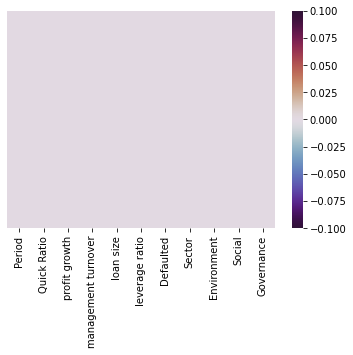

In [ ]:
#Visualizations
#Setting palette
sns.set_palette("Set2")
sns.heatmap(df.isnull(),yticklabels=False,cmap="twilight_shifted");


In [ ]:
#columns of data
df.columns

Index(['Period', 'Quick Ratio', 'profit growth', 'management turnover',
       'loan size', 'leverage ratio', 'Defaulted', 'Sector', 'Environment',
       'Social', 'Governance'],
      dtype='object')

In [ ]:
#checking for duplicated values
df.duplicated().sum()

0

We have zero duplicated values

In [ ]:
df.head()

Period  Quick Ratio  profit growth  management turnover  loan size  \
1     1.0         0.29          -0.18                 0.11      53.06   
2     1.0         2.07           0.44                 0.38     403.37   
3     1.0         0.18          -0.09                 0.25     106.22   
4     1.0         0.34           0.19                 0.10     452.29   
5     1.0         0.65           0.20                 0.18     441.16   

   leverage ratio  Defaulted  Sector  Environment    Social  Governance  
1            0.70        1.0     1.0     0.028130  0.209371   -0.719051  
2            0.21        0.0     1.0     0.156548  0.042234   -0.854891  
3            0.83        1.0     1.0    -0.426099  0.384244    0.108842  
4            0.36        1.0     1.0    -0.221770  0.299328    0.087536  
5            0.49        0.0     1.0    -0.244648 -1.993649   -0.548874

## Data Visualizations

To check for the amount of data in each sector-

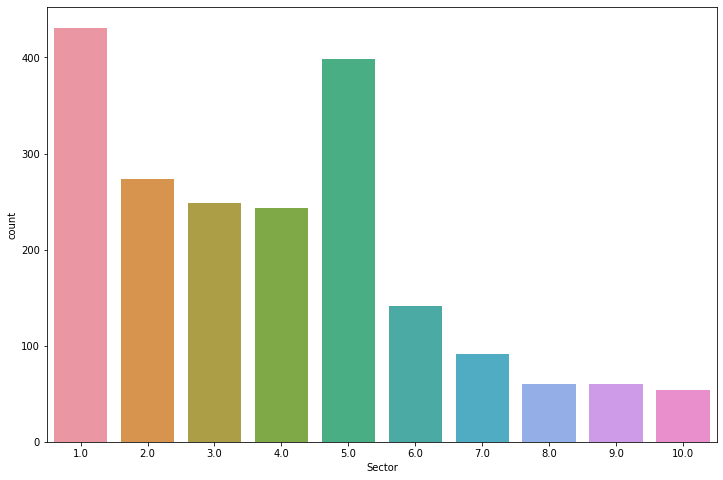

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df["Sector"]);

It is observed that the amount of data in each sector (1-10) differs a lot. Sectors 1 and 5 have the most and 8-10 have the least amount of data.

In [ ]:
newdf = pd.DataFrame(df)
newdf.keys()

Index(['Period', 'Quick Ratio', 'profit growth', 'management turnover',
       'loan size', 'leverage ratio', 'Defaulted', 'Sector', 'Environment',
       'Social', 'Governance'],
      dtype='object')

Checking for correlations between each variable-

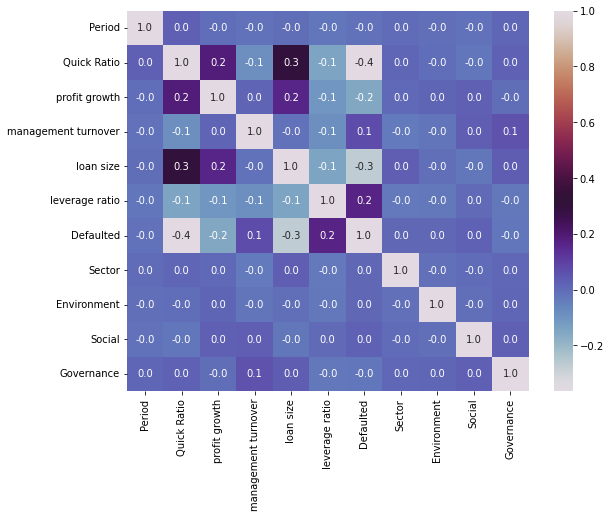

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(newdf.corr(), annot=True, fmt=".1f", cmap='twilight');

It is observed that there is no strong positive or negative correlation between any variable as such. <br> The variable pairs Defaulted and Quick ratio, Defaulted and Loan Size, Defaulted and profit growth seem to have a somewhat noticable negative correlation. <br> Whereas Loan size, quick ratio seem to have a noticable positive correlation. <br> Values closer to zero demonstrate that there is not much of a linear trend between the two variables.

Following is the distribution of values of E,S,G for each sector in the form of a joint plot.

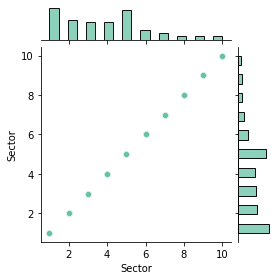

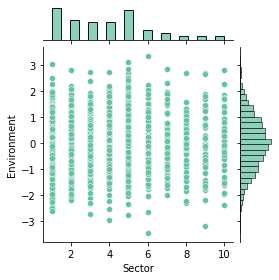

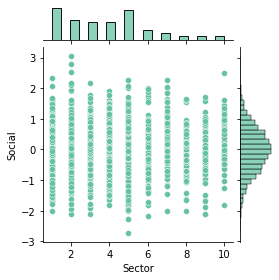

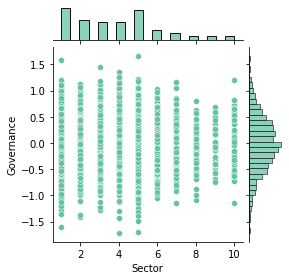

In [ ]:
sns.jointplot(data=newdf, x="Sector", y="Sector", height=4);
sns.jointplot(data=newdf, x="Sector", y="Environment", height=4)
sns.jointplot(data=newdf, x="Sector", y="Social", height=4)
sns.jointplot(data=newdf, x="Sector", y="Governance", height=4);

1. **Quick ratio** determines the liquidity of a company. So if the quick ratio is high, the company has  a higher propensity to not default. It is observed that the orange points (Defaulted=yes) more evident where the quick ratio is low. This complies with the relationship of quick ratio and defaulting.
2. **Profit Growth** shows the profitability of the company. Higher profit growth corresponds to less tendency to default. Negative profit growth indicates decline in a company's sales or earnings. It is observed that the orange points (Defaulted=yes) more evident where the profit growth is low.
3. **Loan Size** is the amount borrowed. A higher loan size indicates lesser tendency to default. It is observed that the orange points (Defaulted=yes) more evident where the loan size is low.

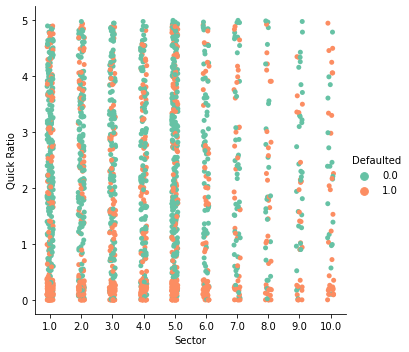

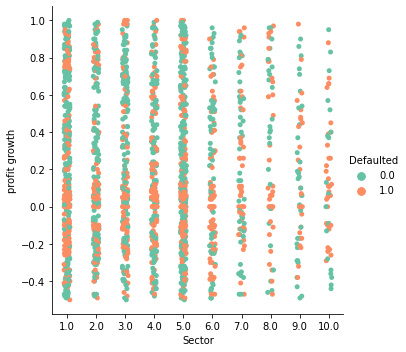

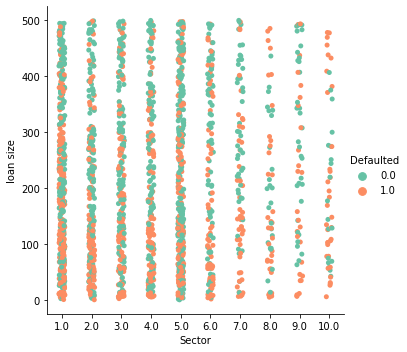

In [ ]:
sns.catplot(x="Sector", y="Quick Ratio", hue="Defaulted", kind="strip", data=newdf);
sns.catplot(x="Sector", y="profit growth", hue="Defaulted", kind="strip", data=newdf);
sns.catplot(x="Sector", y="loan size", hue="Defaulted", kind="strip", data=newdf);

Pairplots have been plotted below to identify if any specific correlations exist between two or more features in the dataset. It also displays no outliers, showing that our data is clean in that aspect. 

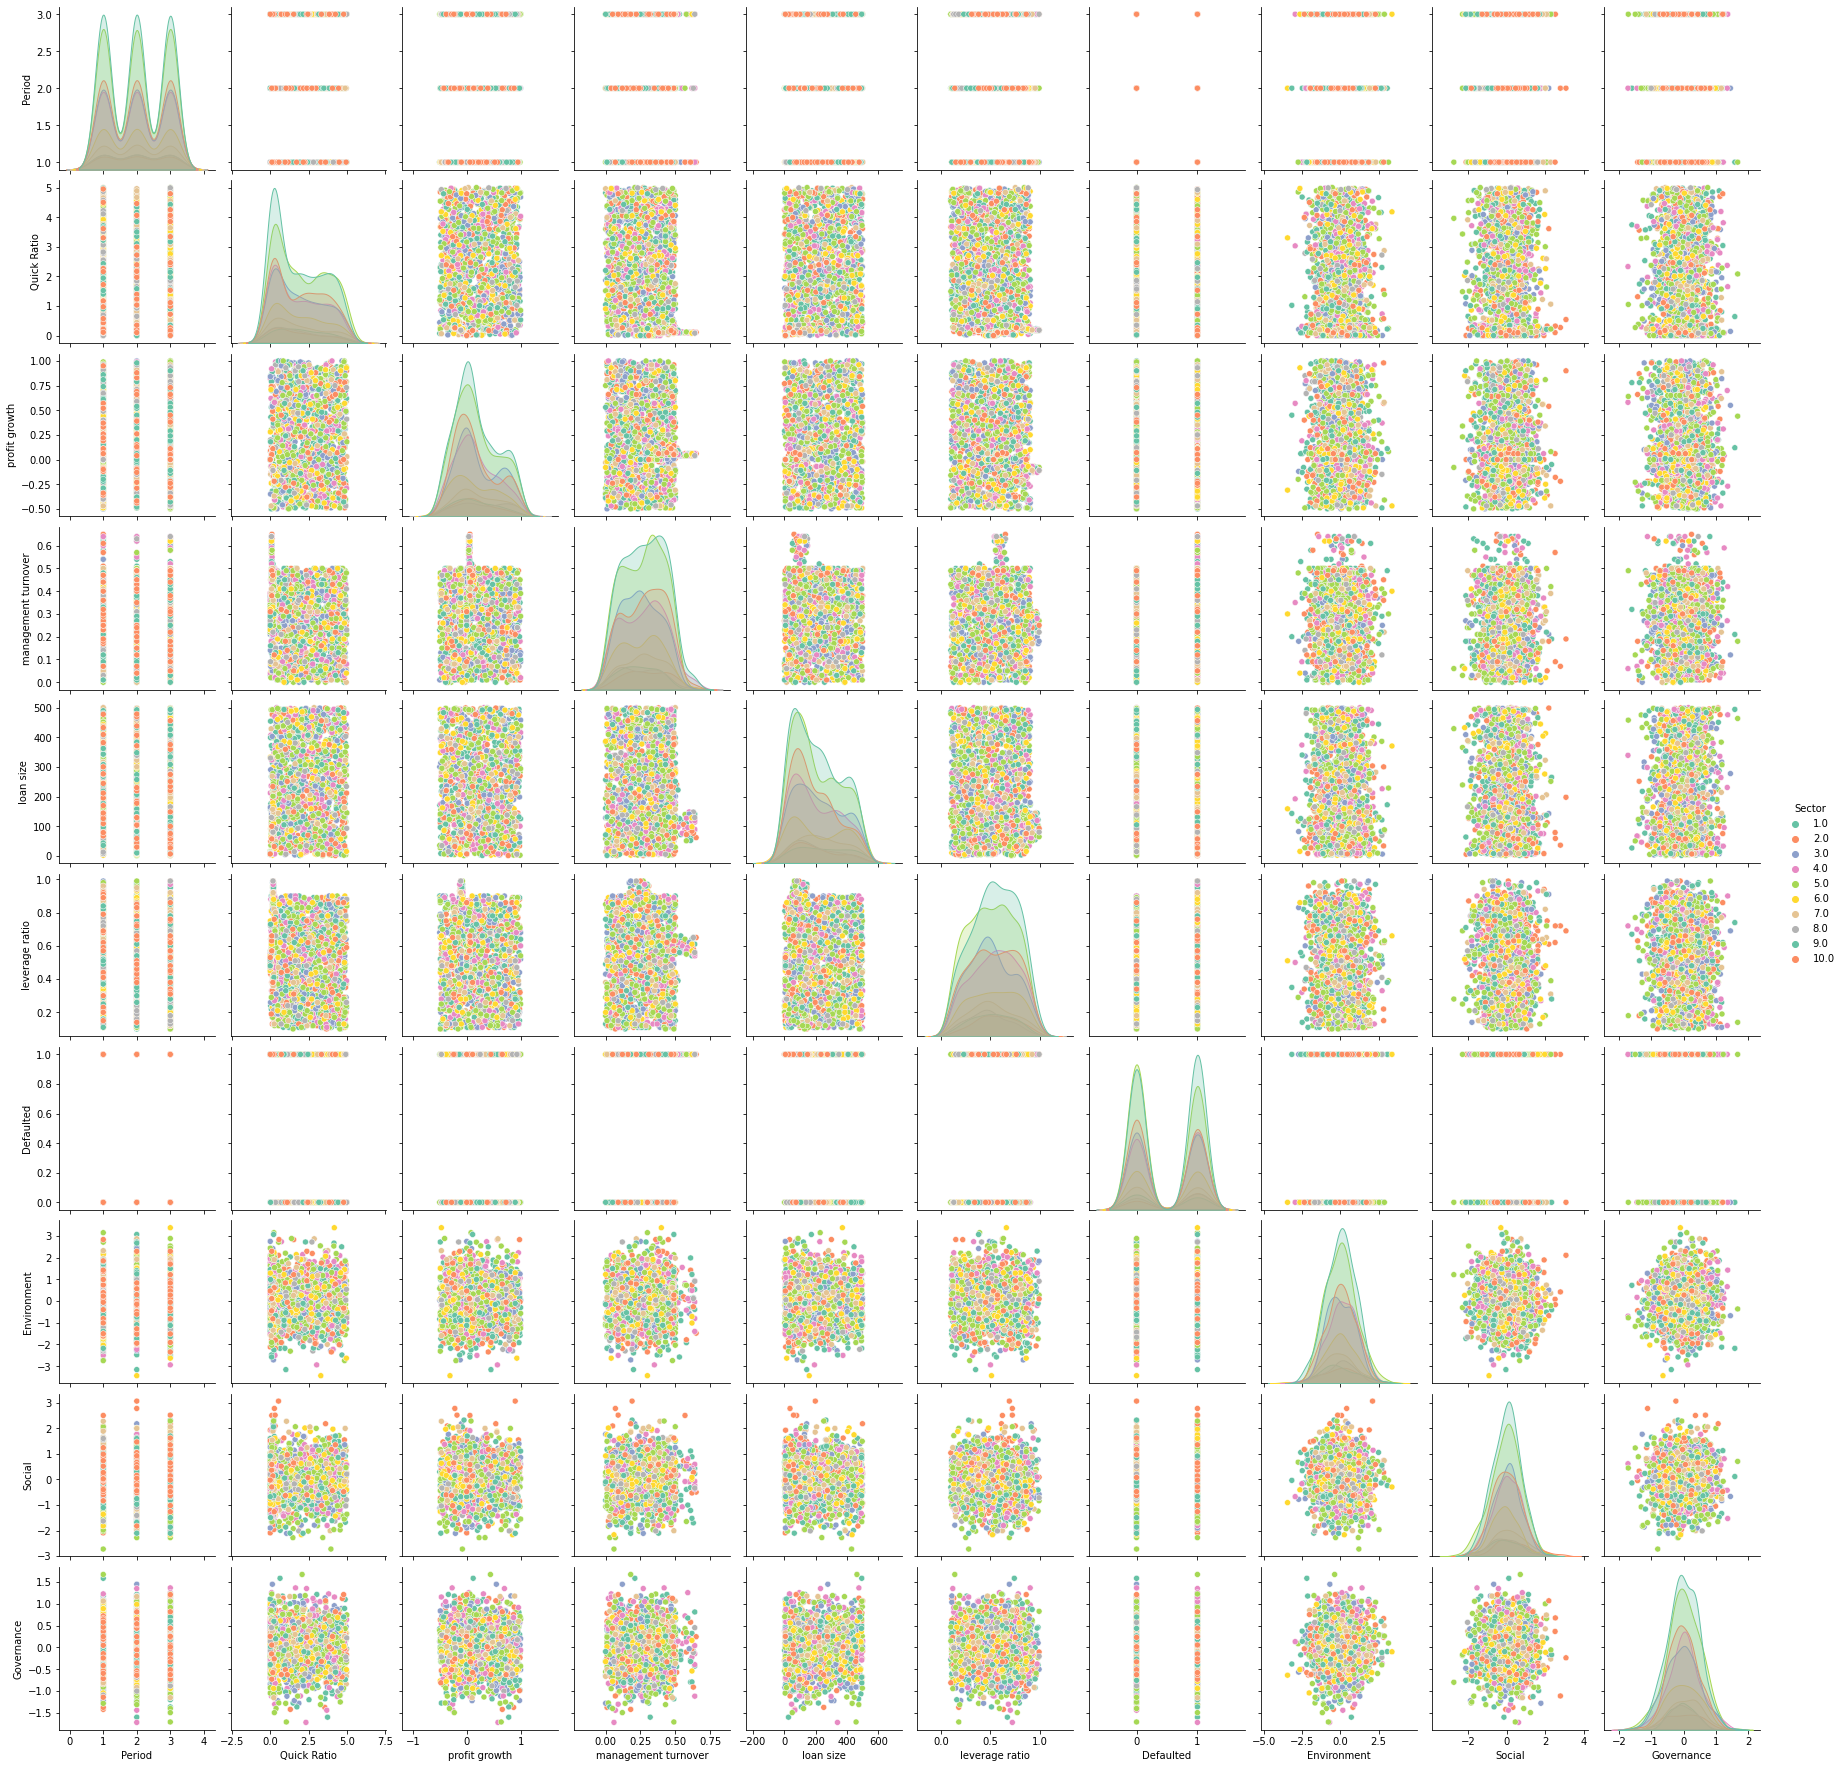

In [ ]:
sns.pairplot(newdf, hue= "Sector", palette='Set2');

In order to analyze how the ESG factors drive the default rate trends in each sector, I have plotted the mean values of E,S and G for the defaulted values (non default=0,default=1) for every sector. <br> To do so, I sorted the E,S and G scores on the basis of defaulted values. <br> These plots will help conclude that depending on the sector’s business line (Envornment/ Social/ Governance), different subsets of the metrics can be focused on to devise sustainability performance targets.

Sector=1


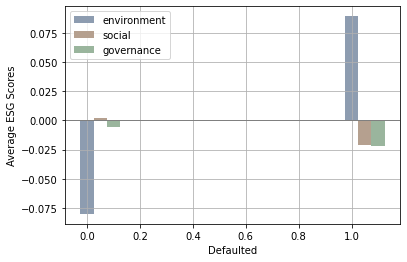

Sector=2


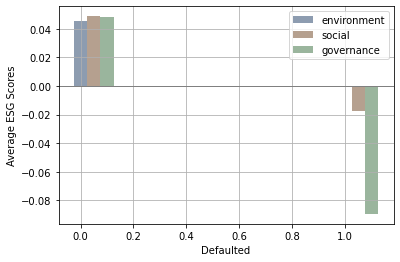

Sector=3


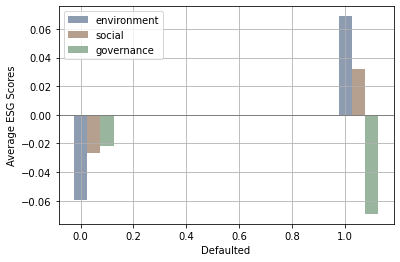

Sector=4


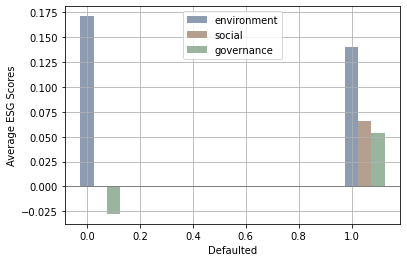

Sector=5


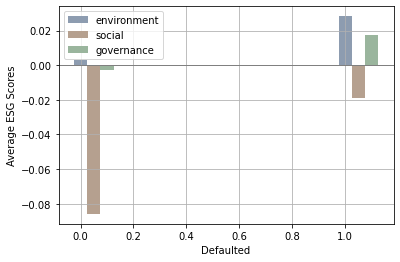

Sector=6


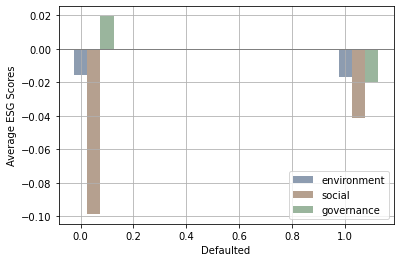

Sector=7


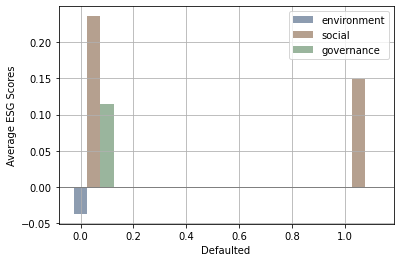

Sector=8


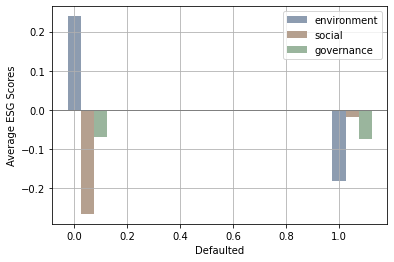

Sector=9


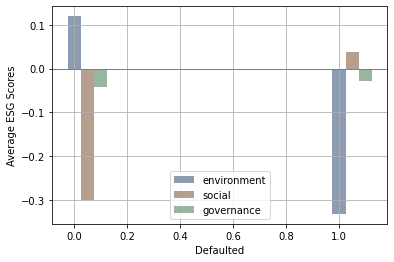

Sector=10


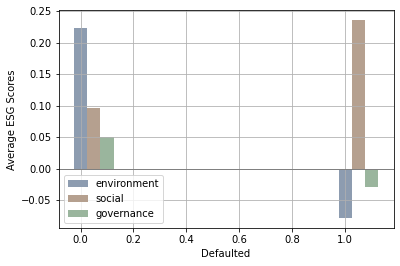

In [ ]:
for i in range(1,11):
    newdf[newdf['Sector']==i].head()
    print(f'Sector={i}')
    width = 0.05

    
    #ENVIRONMENT
    #defaulted
    env = newdf[newdf['Sector']==i][newdf[newdf['Sector']==i]['Defaulted']==1].loc[:,"Environment"].mean()
    #non defaulted
    noenv = newdf[newdf['Sector']==i][newdf[newdf['Sector']==i]['Defaulted']==0].loc[:,"Environment"].mean()
    
    #plot
    plt.bar(np.linspace(0,0), np.linspace(noenv,0), width = 0.05, color='#8d9cb0', label='environment')
    plt.bar(np.linspace(1,1), np.linspace(0, env), width = 0.05, color = '#8d9cb0')
    plt.axhline(0, color='grey', linewidth = 1);

    #SOCIAL
    #defaulted
    soc = newdf[newdf['Sector']==i][newdf[newdf['Sector']==i]['Defaulted']==1].loc[:,"Social"].mean()
    #non defaulted
    nosoc = newdf[newdf['Sector']==i][newdf[newdf['Sector']==i]['Defaulted']==0].loc[:,"Social"].mean()
    
    #plot
    plt.bar(np.linspace(0,0)+width, np.linspace(nosoc,0), width = 0.05, color='#b5a08f', label='social')
    plt.bar(np.linspace(1,1)+width, np.linspace(0, soc), width = 0.05, color = '#b5a08f')
    plt.axhline(0, color='grey', linewidth = 1);

    #GOVERNANCE
    #defaulted
    gov = newdf[newdf['Sector']==i][newdf[newdf['Sector']==i]['Defaulted']==1].loc[:,"Governance"].mean()
    #non defaulted
    nogov = newdf[newdf['Sector']==i][newdf[newdf['Sector']==i]['Defaulted']==0].loc[:,"Governance"].mean()
    
    #plot
    plt.bar(np.linspace(0,0)+2*width, np.linspace(nogov,0), width = 0.05, color='#9ab59d', label='governance')
    plt.bar(np.linspace(1,1)+2*width, np.linspace(0, gov), width = 0.05, color = '#9ab59d')
    plt.axhline(0, color='grey', linewidth = 1);
    plt.xlabel('Defaulted')
    plt.ylabel('Average ESG Scores')
    plt.legend()
    plt.grid()
    plt.show()


We now know that the default rate occurances in each sector affect the scores differently. Following observations are made:

The polarity of each feature between default and non default feature values helps us understand the reason why a sector sees low default rates. (order of prefrence considered is G>E>S)

1. For Sector 1 and 3, **negative Environment** score leads to low default rate.
2. For Sector 2, **positive Governance** score leads to lower default rate. 
3. For Sector 4, **negative Governance** score leads to lower default rate.
4. For Sector 5 and 6, **Social score < -0.05** leads to lower default rate.
5. For Sector 7, **positive Governance** leads to lower default rate.
6. For Sector 8,9 and 10, **positive Environment** score leads to lower default rate.

To understand the trend of default rates for each sector, I appended a column form the appendix of the GitHub user (in README.md) and created plots for default rate values for each sector. Since we are performing predictive credit risk analysis, we would like to know how the default rate changes with time. We aim to plot the default rate as a function of period for different sectors.



In [ ]:
#appending a column for default rates per period per sector as given in the appendix of the github user
import numpy as np
def ratedef(df):
  sec = df[0]
  per = df[1]

  default_rates = {1:{1:0.522,2:0.517,3:0.534},
                   2:{1:0.499,2:0.487,3:0.440},
                   3:{1:0.547,2:0.488,3:0.457},
                   4:{1:0.563,2:0.509,3:0.500},
                   5:{1:0.456,2:0.458,3:0.494},
                   6:{1:0.513,2:0.419,3:0.565},
                   7:{1:0.508,2:0.486,3:0.501},
                   8:{1:0.588,2:0.674,3:0.460},
                   9:{1:0.372,2:0.504,3:0.502},
                   10:{1:0.646,2:0.646,3:0.597},
                   }
  d = default_rates.get(sec)
  if d:
    dr = d[per]
    return dr
  return 0 

In [ ]:
a = df[['Sector', 'Period']].values
d=[]
i=0
for i in range(a.shape[0]):
  d.append(ratedef(a[i]))
df['default_rates']=np.array(d)

In [ ]:
df.head()

Period  Quick Ratio  profit growth  management turnover  loan size  \
1     1.0         0.29          -0.18                 0.11      53.06   
2     1.0         2.07           0.44                 0.38     403.37   
3     1.0         0.18          -0.09                 0.25     106.22   
4     1.0         0.34           0.19                 0.10     452.29   
5     1.0         0.65           0.20                 0.18     441.16   

   leverage ratio  Defaulted  Sector  Environment    Social  Governance  \
1            0.70        1.0     1.0     0.028130  0.209371   -0.719051   
2            0.21        0.0     1.0     0.156548  0.042234   -0.854891   
3            0.83        1.0     1.0    -0.426099  0.384244    0.108842   
4            0.36        1.0     1.0    -0.221770  0.299328    0.087536   
5            0.49        0.0     1.0    -0.244648 -1.993649   -0.548874   

   default_rates  
1          0.522  
2          0.522  
3          0.522  
4          0.522  
5          0.522

The visualization below is important to understand what policies can be implemented and when, in order to reduce the default rates. <br>

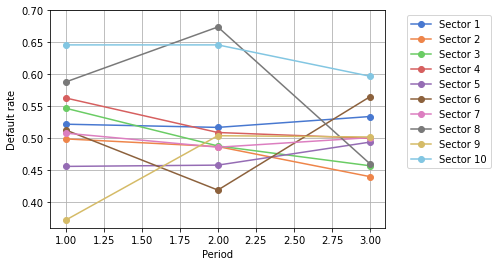

In [ ]:
# df[(df['Period'] == 1) & (df['Sector'] == 1)].loc[:,"default_rates"].mean()
sns.set_palette('muted',10)
datasort = dict(tuple(df.groupby(['Sector', 'Period'])))
sec_wise_dr=[]
for i in datasort:
    # print(datasort[i].loc[:,"default_rates"].mean())
    #first 3 vals are sector 1, all period and so on
    y1 = datasort[i].loc[:,"default_rates"].mean()
    sec_wise_dr.append(y1)

x = np.linspace(1,3,3)
sec_wise_dr_array = np.asarray(sec_wise_dr)
elements_in_group=3
n=int(len(sec_wise_dr_array)/elements_in_group)
grouped_list=sec_wise_dr_array.reshape(n, elements_in_group)

for i in range (0, n):
    plt.plot(x,grouped_list[i,:], 'o-')
plt.legend(['Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5', 'Sector 6', 'Sector 7', 'Sector 8', 'Sector 9', 'Sector 10'], bbox_to_anchor=(1.05, 1))
plt.ylim(0.36,0.7)
plt.xlabel('Period')
plt.ylabel('Default rate')
plt.grid();

From the above plot, it is observed that Sector 5 has a clear upward trend, Sectors 2,3,4,10 have clear downward trend, Sector 6 and 8 have volatile and reversing trends, Sectors 1,7,9 seem to have inconclusive trends. 

For example, Lower interest rates reduce default probabilities. So, for overenthusiastic curves like Sector 5, if the interest rate is reduced, the default probabilities can be reduced as well.

## Random Forest Regression 

In [ ]:
#importing libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

### Splitting Data

In [ ]:
# X and Y split
X = df.drop(['Defaulted'],axis='columns',inplace=False)
Y = df['Defaulted']

# Test and Train Set Split (train = 70% / test = 30%)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=500)

# forest.fit(X, Y)
forest = forest.fit(train_x,train_y)
pred_y = forest.predict(test_x)
pred_prob_y = forest.predict_proba(test_x)

#Evaluation
print("MAE:",mean_absolute_error(test_y, pred_y))
print("Accuracy:",accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y))
print('R-Squared Score:', forest.score(test_x, test_y))

MAE: 0.255
Accuracy: 0.745
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.68      0.90      0.78       296
         1.0       0.86      0.59      0.70       304

    accuracy                           0.74       600
   macro avg       0.77      0.75      0.74       600
weighted avg       0.77      0.74      0.74       600

R-Squared Score: 0.745


ESG + Credit Data = 74.5% Accuracy for performance of model

In [ ]:
# X and Y split- NO Credit Data
dfnew = df.drop(columns=['Period','Quick Ratio','profit growth','management turnover','loan size','leverage ratio'])
X1 = dfnew.drop(['Defaulted'],axis='columns',inplace=False)
Y1 = dfnew['Defaulted']

# Test and Train Set Split (train = 70% / test = 30%)
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, Y1, test_size=0.3, random_state=42)

forest1 = RandomForestClassifier(random_state=500)
forest1 = forest1.fit(train_x1,train_y1)
pred_y1 = forest1.predict(test_x1)
pred_prob_y1 = forest1.predict_proba(test_x1)

#Evaluation
print("MAE:",mean_absolute_error(test_y1, pred_y1))
print("Accuracy:",accuracy_score(test_y1, pred_y1, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y1, pred_y1))
print('R-Squared Score:', forest1.score(test_x1, test_y1))

MAE: 0.49833333333333335
Accuracy: 0.5016666666666667
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52       296
         1.0       0.51      0.47      0.49       304

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

R-Squared Score: 0.5016666666666667


ESG Only = 50.16% Accuracy for performance of model

In [ ]:
# X and Y split- NO ESG
dfnoESG = df.drop(columns=['Environment','Governance','Social'])
X2 = dfnoESG.drop(['Defaulted'],axis='columns',inplace=False)
Y2 = dfnoESG['Defaulted']

# Test and Train Set Split (train = 70% / test = 30%)
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size=0.3, random_state=42)

forest2 = RandomForestClassifier(random_state=500)
forest2 = forest2.fit(train_x2,train_y2)
pred_y2 = forest2.predict(test_x2)
pred_prob_y2 = forest2.predict_proba(test_x2)

#Evaluation
print("MAE:",mean_absolute_error(test_y2, pred_y2))
print("Accuracy:",accuracy_score(test_y2, pred_y2, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y2, pred_y2))
print('R-Squared Score:', forest2.score(test_x2, test_y2))

MAE: 0.26
Accuracy: 0.74
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       296
         1.0       0.85      0.59      0.70       304

    accuracy                           0.74       600
   macro avg       0.76      0.74      0.73       600
weighted avg       0.77      0.74      0.73       600

R-Squared Score: 0.74


Credit Data Only = 74.0% Accuracy for performance of model

It can be observed that the accuracy is highest when all features are considered. Hence, I will try to tune the hyperparameters for the model where all features (Credit+ESG) are considered. 

### Checking for overfitting
When a model performs highly on the training set but poorly on the test set, this is known as overfitting. Here we check for overfitting and see if we can tune any parameters to get a better fit.

In [ ]:
forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# check for overfitting (max_leaf_nodes)

nodes = np.arange(2,31)
error_train = []
error_test = []

for i in nodes:
    # 70% train data
    model = RandomForestClassifier(max_leaf_nodes = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at nodes:",nodes[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at nodes:",nodes[error_test.index(min(error_test))])

Training Set Min Error Rate: 20.429% at nodes: 28
Testing Set Error Rate: 25.333% at nodes: 27


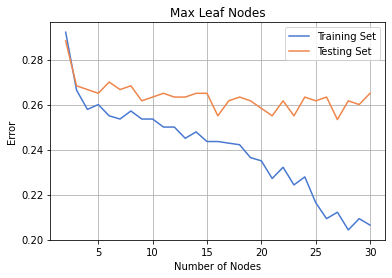

In [ ]:
# range for cvgrid for leaf nodes
plt.title('Max Leaf Nodes')
plt.plot(nodes,error_train, label='Training Set')
plt.plot(nodes,error_test, label='Testing Set')
plt.xlabel('Number of Nodes')
plt.ylabel('Error')
plt.grid()
plt.legend();

The testing set error % is reducing a bit significantly with training dataset only till an average range of 2-8 nodes. The train and test sets start diverging after crossing that range, hence we can choose a range of 2-8 to optimize for no overfitting.

In [ ]:
# check for overfitting (depth) 

depths = np.arange(2,21)
error_train = []
error_test = []

for i in depths:
    # 70% train data
    model = RandomForestClassifier(max_depth = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at depths:",depths[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at depths:",depths[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.000% at depths: 17
Testing Set Error Rate: 24.333% at depths: 12


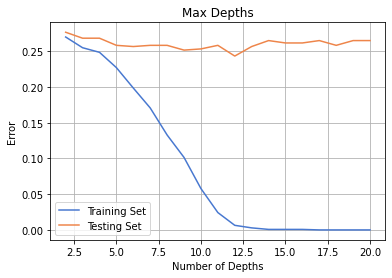

In [ ]:
# range for cvgrid for max depths
plt.title('Max Depths')
plt.plot(depths,error_train, label='Training Set')
plt.plot(depths,error_test, label='Testing Set')
plt.xlabel('Number of Depths')
plt.ylabel('Error')
plt.grid()
plt.legend();

The testing set error % is reducing a bit significantly with training dataset only till an average range of 2-4 nodes. The train and test sets start diverging after crossing that range, hence we can choose a range of 2-4 to optimize for no overfitting.

In [ ]:
# check for overfitting (min sample split) 

split = np.arange(2,100)
error_train = []
error_test = []

for i in split:
    # 70% train data
    model = RandomForestClassifier(min_samples_split = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at samples:",split[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at samples:",split[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.000% at samples: 2
Testing Set Error Rate: 24.500% at samples: 14


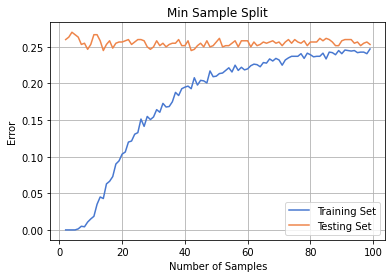

In [ ]:
# range for cvgrid for min sample split

plt.title('Min Sample Split')
plt.plot(split,error_train, label='Training Set')
plt.plot(split,error_test, label='Testing Set')
plt.xlabel('Number of Samples')
plt.ylabel('Error')
plt.grid()
plt.legend();

to optimize for no overfitting, train set error shouldnt be significantly lower than test set error, which is seen in the range 90-100, hence, I would ideally choose this range for the param_grid but since it takes too much computation time, I will be choosing a smaller range, 2-10

Initiating a grid that considers specific ranges of parameters where its safe to assume there is little to no overfitting.

In [ ]:
#gridCv
# initiate grid
try_grid = [{
            'criterion':['gini','entropy'],
            'max_depth':np.arange(2,5),
            'max_leaf_nodes':np.arange(2,9),
            'min_samples_split':np.arange(2,11),
            }]
#try_grid
RF_model = GridSearchCV(RandomForestClassifier(), param_grid=try_grid, cv=10)
# fit the model with a combination of the parameters, this will take a while to run

RF_model.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([2, 3, 4]),
                          'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8]),
                          'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])}])

In [ ]:
print(f'RF_model.best_score_={RF_model.best_score_}')
print(f'RF_model.best_params_={RF_model.best_params_}')

RF_model.best_score_=0.7392857142857143
RF_model.best_params_={'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 7}


In [ ]:
RF_model_best = RandomForestClassifier(
                                        n_estimators=500,
                                        criterion = 'entropy',
                                        max_depth = 4, 
                                        max_leaf_nodes = 6,
                                        min_samples_split = 5,
                                        )

RF_model_best.fit(train_x,train_y)
pred_y_2 = RF_model_best.predict(test_x)
pred_prob_y_2 = RF_model_best.predict_proba(test_x)
# evaluate result

print("MAE:",mean_absolute_error(test_y, pred_y_2))
print("Accuracy:",accuracy_score(test_y, pred_y_2, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y_2))

MAE: 0.265
Accuracy: 0.735
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.66      0.94      0.78       296
         1.0       0.90      0.54      0.67       304

    accuracy                           0.73       600
   macro avg       0.78      0.74      0.72       600
weighted avg       0.78      0.73      0.72       600



In [ ]:
from sklearn.tree import export_text
feature_list = list(X.columns)
r = export_text(RF_model_best.estimators_[0], feature_names=feature_list)
print(r)

|--- loan size <= 141.53
|   |--- leverage ratio <= 0.45
|   |   |--- management turnover <= 0.31
|   |   |   |--- class: 0.0
|   |   |--- management turnover >  0.31
|   |   |   |--- class: 1.0
|   |--- leverage ratio >  0.45
|   |   |--- Quick Ratio <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- Quick Ratio >  0.50
|   |   |   |--- profit growth <= 0.88
|   |   |   |   |--- class: 0.0
|   |   |   |--- profit growth >  0.88
|   |   |   |   |--- class: 1.0
|--- loan size >  141.53
|   |--- class: 0.0



# Results and Discussions

The order of importance of featueres can be observed below. <br>
It is noted that the most important credit features are Quick Ratio, Loan Size and Profit Growth, and the order of importnace of ESG features is Governance, Environmental and then Social. This corresponds with the base assumption made in the beginning of this project.

feature_list=['Period', 'Quick Ratio', 'profit growth', 'management turnover', 'loan size', 'leverage ratio', 'Sector', 'Environment', 'Social', 'Governance', 'default_rates']
RF_model_best.feature_importances_=[2.79232666e-04 4.87087461e-01 1.63098469e-01 4.19313002e-02
 1.65488324e-01 9.21539129e-02 1.90555337e-03 1.17830715e-02
 7.83905769e-03 1.05383809e-02 1.78952363e-02]


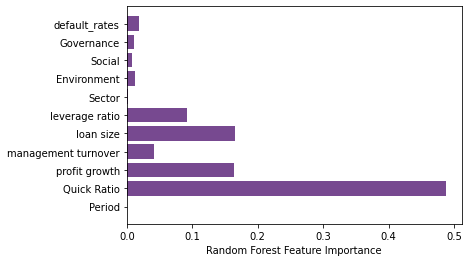

In [ ]:
print(f'feature_list={feature_list}')
print(f'RF_model_best.feature_importances_={RF_model_best.feature_importances_}')
plt.barh(feature_list, RF_model_best.feature_importances_, color='#774990')
plt.xlabel("Random Forest Feature Importance");

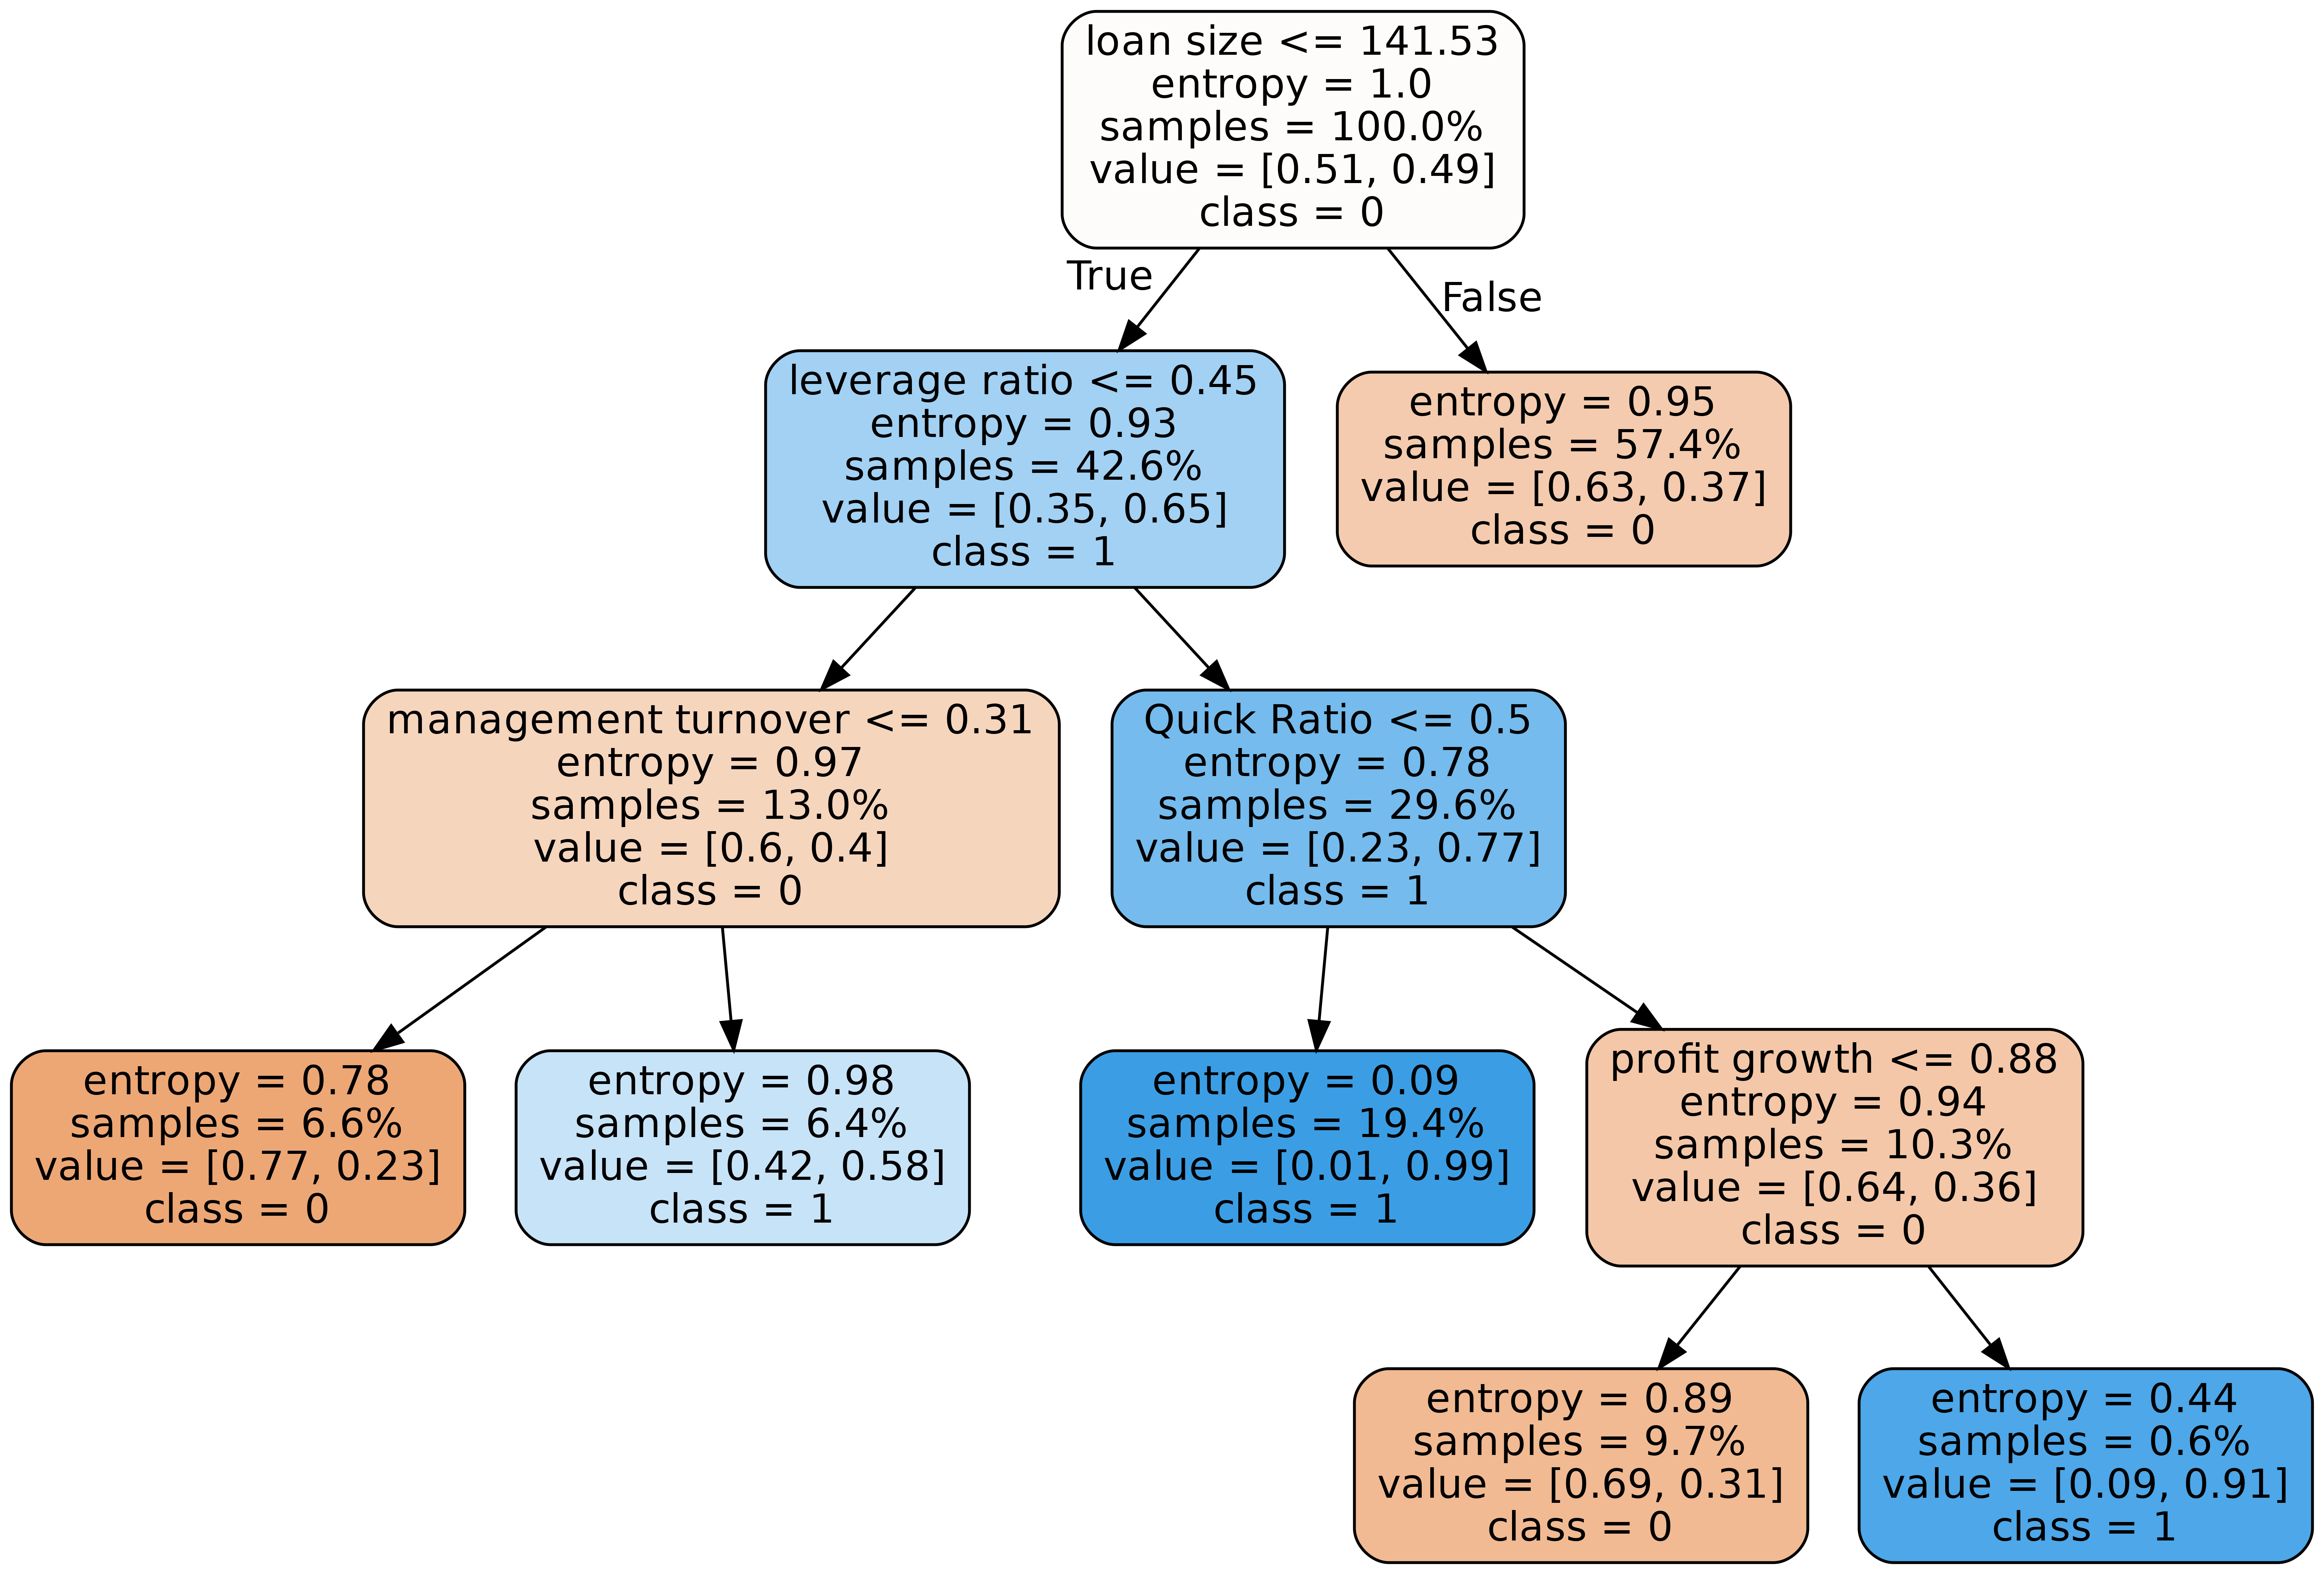

In [ ]:
estimator = RF_model_best.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names =  feature_list,
                class_names = '01',   #def=1, non def =0
                rounded = True, proportion = True, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

AUC - baseline=0.7448490842816502
AUC - revised model=0.7474106507823612


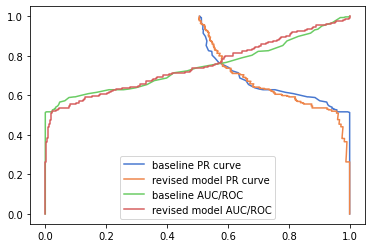

In [ ]:
from sklearn.metrics import precision_recall_curve
test_y_array = np.array(test_y)
# precision-recall curve
precision1, recall1, threshold1 = precision_recall_curve(test_y_array, pred_prob_y[:,1])
precision2, recall2, threshold2 = precision_recall_curve(test_y_array, pred_prob_y_2[:,1])
plt.plot(precision1,recall1, label='baseline PR curve') #baseline
plt.plot(precision2,recall2, label='revised model PR curve') #cvgrid new model
plt.legend()

# ROC
fpr1, tpr1, threshold3 = metrics.roc_curve(test_y_array, pred_prob_y[:,1],pos_label=1)
fpr2, tpr2, threshold4 = metrics.roc_curve(test_y_array, pred_prob_y_2[:,1],pos_label=1)
plt.plot(fpr1,tpr1, label='baseline AUC/ROC') #baseline
plt.plot(fpr2,tpr2, label='revised model AUC/ROC') #cvgrid new model
plt.legend();
print(f'AUC - baseline={metrics.auc(fpr1, tpr1)}')
print(f'AUC - revised model={metrics.auc(fpr2, tpr2)}')

Its important to note that overfitting and accuracy dont always go together, so in order to optimize for lower overfitting in this project, we had to compromise the accuracy. The final accuracy of the default model is 74.5%, whereas that of the tuned model is 73.16%.

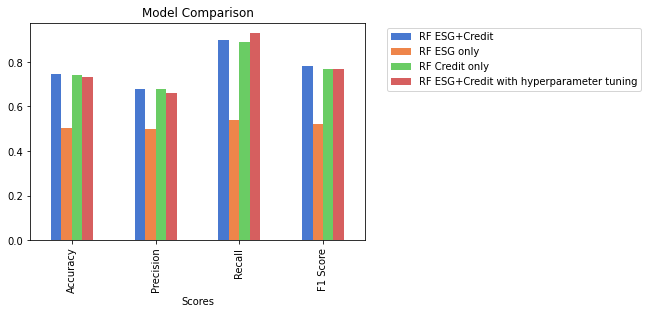

In [ ]:
Score = pd.DataFrame({'Scores':['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                    'RF ESG+Credit': [0.745,0.68,0.9,0.78],
                    'RF ESG only': [0.50167,0.5,0.54,0.52],
                    'RF Credit only': [0.74,0.68,0.89,0.77],
                    'RF ESG+Credit with hyperparameter tuning': [0.73167,0.66,0.93,0.77]})

Score.plot(x='Scores', y = ['RF ESG+Credit',
                            'RF ESG only',
                            'RF Credit only',
                            'RF ESG+Credit with hyperparameter tuning'],
                         kind='bar', title='Model Comparison')

plt.legend(bbox_to_anchor=(1.05, 1));
                    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb3bc87c-d2b4-4300-9253-eaf4f64b616f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>